# PART 2- Exploratory Data Analysis

1. The provided notebook performs Exploratory Data Analysis(EDA) on the data collected in part 1 from 'r/india' subreddit.
2. Various methods of performing EDA have been used.

## 2.1- Importing the libraries used for performing EDA
The following libraries were used to perform EDA on the acquired data set :- 

In [40]:
import praw # Python Reddit API Wrapper
import pandas as pd
import csv # Writing and Reading the acquired data from Reddit
import os
import matplotlib.pyplot as plt #Visual Representation of Data
import seaborn as sns #Visual Representation of Data

## 2.2- Aquiring Data from Reddit ( Part 1 ) 
This is one of the most important tasks in EDA. This is basically a repetition of Part 1. The Data from Reddit is written to a CSV file which is later loaded from that CSV into the Pandas Data Frame.

In [41]:
"""The below code extracts the vital credentials from a file consisting of environment variables (.env)
It uses the dotenv library to access and extract the environment variables. This step was carried out as an
immediate precaution to prevent the misuse of credentials. As a result those remain hidden"""

os.chdir('/Users/varishgrover/desktop')#changing the working directory to access the .env file
from dotenv import load_dotenv
load_dotenv()
#Extracting the protected credentials for creating a reddit object
CLIENT_ID= os.getenv("CLIENT_ID")
CLIENT_SECRET= os.getenv("CLIENT_SECRET")
USER_AGENT= os.getenv("USER_AGENT")
USER_NAME= os.getenv("USER_NAME")
PASSWORD= os.getenv("PASSWORD")

In [42]:
"""Creating a Reddit object which will be later used to access the data from the reddit website"""
redditObject= praw.Reddit(client_id= CLIENT_ID,client_secret=CLIENT_SECRET, user_agent=USER_AGENT,
user_name=USER_NAME,password=PASSWORD)

In [47]:
"""Creating a Subreddit object which is specified in the problem statement as r/india. Thus r/india is used 
for initialisation"""
subredditObject= redditObject.subreddit("india")  #extracting data from subreddit --> r/india

newSubredditObject=subredditObject.new(limit=100)
#extracting 500 latest entries from the "new" section in subreddits. This limit was chosen by me and can be 
#modified easily

In [48]:
os.chdir('/Users/varishgrover/Desktop') # Change the working directory
with open('karish.csv','w',newline='') as f:
    myWriter=csv.writer(f)
    myWriter.writerow(['TITLE','URL','ID','AUTHOR','Num Comments','Ups','Downs','Link Flair Text','Link Flair Text Color','Self','Upvote Ratio'])
    for i in newSubredditObject:
        myWriter.writerow([i.title,i.url,i.id,i.author,i.num_comments,i.ups,i.downs,i.link_flair_text,i.link_flair_text_color,i.is_self,i.upvote_ratio])

## 2.3- Loading into the Pandas Data Frame
Reading the created CSV file to see the data written. This code block prints that data in the form of a data frame table using the pandas library.

In [49]:
work=pd.read_csv('karish.csv')
work.head()
#TOP 5 ENTRIES IN THE CSV DATA-SET

,TITLE,URL,ID,AUTHOR,Num Comments,Ups,Downs,Link Flair Text,Link Flair Text Color,Self,Upvote Ratio
0,"Kashmiri terrorist got away 25 yrs ago, caught...",https://www.hindustantimes.com/india-news/kash...,g2yw0s,worriedpast,0,1,0,Non-Political,dark,False,1.00
1,"Looks like Arvind, sounds like Modi",https://m.telegraphindia.com/india/looks-like-...,g2yv5s,azemda,0,3,0,Politics,dark,False,1.00
2,Coronavirus | its official no IPL this summer,https://newsnblogs.com/coronavirus-its-officia...,g2yv2l,KeeshaRuffing,0,1,0,Sports,dark,False,0.67
3,Expect 100 Covid-19 cases a day in Ahmedabad: ...,https://timesofindia.indiatimes.com/city/ahmed...,g2yp94,ReallyRedditLover,0,4,0,Coronavirus,dark,False,1.00
4,Gujarat: Industry to resume work on April 20 |...,https://timesofindia.indiatimes.com/city/ahmed...,g2yor4,ReallyRedditLover,0,2,0,Coronavirus,dark,False,1.00


In [50]:
work=pd.read_csv('karish.csv')
work.tail()
#LAST 5 ENTRIES IN THE CSV DATA-SET

,TITLE,URL,ID,AUTHOR,Num Comments,Ups,Downs,Link Flair Text,Link Flair Text Color,Self,Upvote Ratio
95,"Random Daily Discussion Thread - April 17, 202...",https://www.reddit.com/r/india/comments/g2ucgt...,g2ucgt,oxythebot,16,6,0,Scheduled,dark,True,0.82
96,Uttar Pradesh becomes first State in the count...,http://newsonair.com/News?title=Uttar-Pradesh-...,g2ua1f,muhammad_sitaram,3,45,0,Coronavirus,dark,False,0.89
97,The heartbreaking last texts of an Indian hosp...,https://www.reddit.com/r/india/comments/g2u4e1...,g2u4e1,Lister971191,1,15,0,Coronavirus,dark,True,0.86
98,Rich people brought COVID-19 to State: Tamil N...,https://www.thehindu.com/news/national/tamil-n...,g2u1uc,bookshearer,2,11,0,Coronavirus,dark,False,0.92
99,‘CATastrophe’ averted as India court rules on ...,https://gulfnews.com/world/asia/india/catastro...,g2ty1p,Lister971191,0,8,0,Coronavirus,dark,False,0.84


## 2.3- Data Types
1. The data types of all the parameters are outputted using the following code block.
2. This is important as it gives a clear distinction between numerical and non-numerical variables
3. This helps the user to understand which factors require a statistical analysis and which dont.

In [51]:
work.dtypes
# int64- Integers
# float64- Floating point numbers
# bool- Boolean Value - True or False
# object- Object

TITLE                     object
URL                       object
ID                        object
AUTHOR                    object
Num Comments               int64
Ups                        int64
Downs                      int64
Link Flair Text           object
Link Flair Text Color     object
Self                        bool
Upvote Ratio             float64
dtype: object

## 2.4- A Few Aggregates

1. This part deals only with the analysis of numerical variables from among the collected data.

2. The AIM of this part is to calculate a few aggregates.

3. This part brings forth several characteristics about the collected data. A brief analysis can be presented as:-

      a) We can find the mean number of comments, up votes , down votes and upvote ratio. The mean of all these numerical quantities would give an insight on the usual trend
      
      b) We can find out the minimum and maximum value of these parameters
      
      c) We can even find out the total count or the number of entries in the last 60 entries which have data avaiable corresponding to a particular parameter


4. This step is important as it reveals various trends among the data at a single glance. 

5. Tabular representation of such analysis is quite helpful.

In [52]:
work.describe() #Using the data that was collected in the Part 1 to perform EDA

,Num Comments,Ups,Downs,Upvote Ratio
count,100.000000,100.000000,100.0,100.00000
mean,4.990000,25.850000,0.0,0.85510
std,8.768049,43.609232,0.0,0.16052
min,0.000000,0.000000,0.0,0.19000
25%,0.000000,5.000000,0.0,0.82000
50%,1.000000,10.000000,0.0,0.90000
75%,6.000000,25.500000,0.0,0.98000
max,46.000000,278.000000,0.0,1.00000


## 2.5- Dropping the Null or Missing Values

It is quite possible that a given entry does not have data corresponding to a particular paramter or the data is present but the data is null. It is quite irrelevant to have such null or missing data in out data set. Hence those are dropped very easily. When a few values have missing data, from a data set consisting of many elements , it is convenient to remove the few entries for a better comparision of the remaining entries.

Instead of removing these values , some analytics also prefer to replace the null values with the overall mean but however , here the null values have been removed.

In [53]:
#FINDING THE NUMBER OF MISSING VALUES or NULL Values FOR EACH PARAMETER
print(work.isnull().sum())

TITLE                     0
URL                       0
ID                        0
AUTHOR                    0
Num Comments              0
Ups                       0
Downs                     0
Link Flair Text          10
Link Flair Text Color     0
Self                      0
Upvote Ratio              0
dtype: int64


In [54]:
work = work.dropna()  # DROPPING THE MISSING OR NULL VALUES FOR EACH PARAMETER
print(work.isnull().sum()) 
#FINDING THE NUMBER OF NULL VALUES ONCE AGAIN AFTER REMOVING

TITLE                    0
URL                      0
ID                       0
AUTHOR                   0
Num Comments             0
Ups                      0
Downs                    0
Link Flair Text          0
Link Flair Text Color    0
Self                     0
Upvote Ratio             0
dtype: int64


## 2.6- Sorting A Particular Column / Parameter
This part deals only with the analysis of numerical variables from among the collected data. The ultimate AIM would be sorting any particular variable in ascending or descending order. This might bring 
out the subsequent increase or decrease in a particular data set corresponding to a particular partameter variable. We can also find various quantities like range using this as we know the max and min of the variable.The arrangement in a particular order is quite helpful in analysing the data. 

In [56]:
workSort1=work.sort_values(by='Num Comments')
workSort1
#ARRANGE THE NUMBER OF COMMENTS IN ASCENDING ORDER

,TITLE,URL,ID,AUTHOR,Num Comments,Ups,Downs,Link Flair Text,Link Flair Text Color,Self,Upvote Ratio
0,"Kashmiri terrorist got away 25 yrs ago, caught...",https://www.hindustantimes.com/india-news/kash...,g2yw0s,worriedpast,0,1,0,Non-Political,dark,False,1.00
28,COVID-19: Sree Chitra’s new test kit set to br...,https://www.reddit.com/r/india/comments/g2y0uu...,g2y0uu,Xenomorph007,0,9,0,Coronavirus,dark,True,1.00
30,CCMB to develop inactivated virus vaccine for ...,https://www.biospectrumindia.com/news/58/16251...,g2xuu7,Best-Economist,0,5,0,Science/Technology,light,False,1.00
32,RBI asks banks to suspend dividend payments: k...,https://timesofindia.indiatimes.com/business/i...,g2xma4,i_Killed_Reddit,0,5,0,Policy/Economy,dark,False,1.00
35,What nation can learn from Kerala: Lockdown is...,https://indianexpress.com/article/opinion/colu...,g2xj1s,vv4life,0,23,0,Coronavirus,dark,False,0.90
...,...,...,...,...,...,...,...,...,...,...,...
56,Performance of CM Uddhav in Maharashtra,https://www.reddit.com/r/india/comments/g2w8h1...,g2w8h1,PradyumanACP,24,29,0,Coronavirus,dark,True,0.87
66,Prime Time,https://i.redd.it/1jsn588fdbt41.jpg,g2vqkr,sudden_dust,29,278,0,Non-Political,dark,False,0.90
90,Rahul Gandhi Is Right On COVID-19 Strategy Eve...,https://www.outlookindia.com/website/story/new...,g2uies,wordswithmagic,34,115,0,Coronavirus,dark,False,0.82
47,A friend spewed anti-muslim hate speech on Fac...,https://www.reddit.com/r/india/comments/g2ws4w...,g2ws4w,abhilash1991,40,152,0,Coronavirus,dark,True,0.91


In [57]:
"""Sorting in a particular order helps in analysing the data to our convenience and nature of purpose"""
workSort2=work.sort_values(by='Ups', ascending= False)
workSort2
#ARRANGE THE NUMBER OF UP-VOTES IN A DESCENDING ORDER

,TITLE,URL,ID,AUTHOR,Num Comments,Ups,Downs,Link Flair Text,Link Flair Text Color,Self,Upvote Ratio
66,Prime Time,https://i.redd.it/1jsn588fdbt41.jpg,g2vqkr,sudden_dust,29,278,0,Non-Political,dark,False,0.90
81,I just noticed that Youtube India has started ...,https://imgur.com/C2hDufa,g2v9c8,poco_gamer,46,224,0,Non-Political,dark,False,0.96
47,A friend spewed anti-muslim hate speech on Fac...,https://www.reddit.com/r/india/comments/g2ws4w...,g2ws4w,abhilash1991,40,152,0,Coronavirus,dark,True,0.91
89,"Class 10 student ends life, writes suicide not...",https://www.timesnownews.com/mirror-now/crime/...,g2ulmq,Shellynoire,9,118,0,Non-Political,dark,False,0.97
90,Rahul Gandhi Is Right On COVID-19 Strategy Eve...,https://www.outlookindia.com/website/story/new...,g2uies,wordswithmagic,34,115,0,Coronavirus,dark,False,0.82
...,...,...,...,...,...,...,...,...,...,...,...
2,Coronavirus | its official no IPL this summer,https://newsnblogs.com/coronavirus-its-officia...,g2yv2l,KeeshaRuffing,0,1,0,Sports,dark,False,0.67
0,"Kashmiri terrorist got away 25 yrs ago, caught...",https://www.hindustantimes.com/india-news/kash...,g2yw0s,worriedpast,0,1,0,Non-Political,dark,False,1.00
76,"Paul Henry is back in a job on NZ channel 3, f...",https://twitter.com/NewshubBreaking/status/124...,g2vd90,theexate,1,0,0,Non-Political,dark,False,0.50
71,Beautiful lady Makes a Mushroom factory at home,https://www.youtube.com/watch?v=3BoolJ3sq-E,g2vltc,shwanmm,1,0,0,Business/Finance,dark,False,0.19


## 2.7- Finding the Maximum and Minimum Entries for Some Variable

The values of all parameters corresponding to the highest and the lowest entry of the given input 
parameter are returned 

This use of this function thus brings out more comprehensive data ABOUT THE maxima and the minima

In [58]:
def max_min(parameter):

    """This function takes a column name or a parameter as an input and it returns the MAX and MIN entries 
    corresponding to the input parameter"""
    
    max_=work[parameter].idxmax() #idxmax gives the id of the highest entry
    max_obs=pd.DataFrame(work.loc[max_])
    
    min_=work[parameter].idxmin() #idxmin gives the id of the lowest entry
    min_obs=pd.DataFrame(work.loc[min_])
    
    x=pd.concat([max_obs,min_obs],axis=1)# Both the ones are concatenated into a data frame

    return x

In [59]:
max_min('Num Comments')
#We can do this for any numerical parameter or variable

,81,0
TITLE,I just noticed that Youtube India has started ...,"Kashmiri terrorist got away 25 yrs ago, caught..."
URL,https://imgur.com/C2hDufa,https://www.hindustantimes.com/india-news/kash...
ID,g2v9c8,g2yw0s
AUTHOR,poco_gamer,worriedpast
Num Comments,46,0
Ups,224,1
Downs,0,0
Link Flair Text,Non-Political,Non-Political
Link Flair Text Color,dark,dark
Self,False,False


## 2.8- Visual Representation 

### 2.8.1- Bar Graph

The following Bar Graph shows a distribution of number of posts in the data base from each Flair category. This bar graph is one of the most useful representations as it clearly shows which agendas or topics are most in news i.e. are most discussed. For a common man this graph would clearly and aptly shift his inclination towards the hotter topics, thereby aquainting him to the things going on in the country.

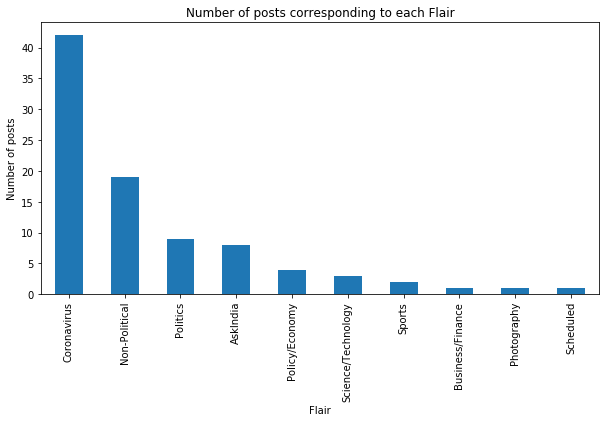

In [84]:
work['Link Flair Text'].value_counts().nlargest(30).plot(kind='bar', figsize=(10,5))
plt.title("Number of posts corresponding to each Flair")
plt.ylabel('Number of posts')
plt.xlabel('Flair');

### 2.8.1.1 A Tabular Representation of the same Data

In [99]:
table=work.groupby('Link Flair Text').size()
#This tabular represntation is also helpful in analysing the scrapped data

### 2.8.2- Pie Chart

The following Pie Graph shows a distribution of number of posts in the data base which are self post and the ones which are shared.
1. True- Self Posts
2. False- Shared posts

This Graph brings out the craze among the people for various posts that they share it .

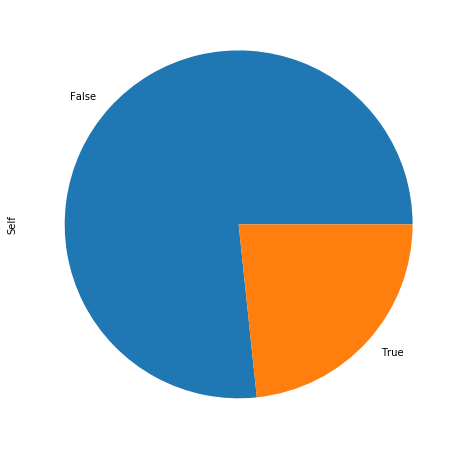

In [88]:
work['Self'].value_counts().nlargest(40).plot(kind='pie', figsize=(8,8))

### 2.8.3 - Probability Density Function

1. Area under a PDF function graph is always 1.
2. The given Probability Density Function shows the density of the Upvote Ratio.
3. It provides a clear understanding of the range of the upvote ratio .
4. It clearly shows that the Up-Vote ratio is usually high enough and close to 1
5. This implies that people take interest in the recent posts.

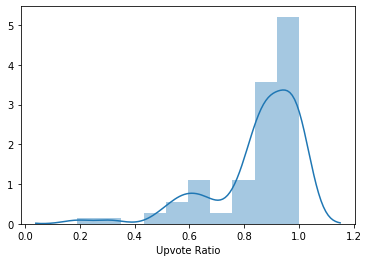

In [101]:
sns.distplot(work['Upvote Ratio'],10)

### 2.8.4- Histograms

The histograms below are a representation of all the numerical variables/parameters :-

In [103]:
#SELECTING ONLY THE NUMERICAL VARIABLES as we can plot a histogram for only the numerical paramters :- 
workNum=work.select_dtypes(include=['int64','float64'])
workNum

,Num Comments,Ups,Downs,Upvote Ratio
0,0,1,0,1.00
1,0,3,0,1.00
2,0,1,0,0.67
3,0,4,0,1.00
4,0,2,0,1.00
...,...,...,...,...
95,16,6,0,0.82
96,3,45,0,0.89
97,1,15,0,0.86
98,2,11,0,0.92


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a243ba128>,
      dtype=object)

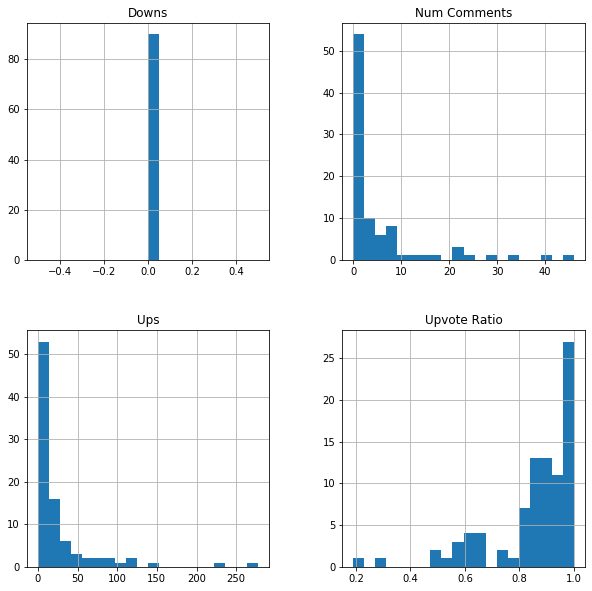

In [106]:
"""These histograms plot the values of the parameters against the number of entries having those values. 
The sum total of these  values is the same for all the graphs as we have removed the null entries already """
workNum.hist(bins=20,figsize=(10,10))

### 2.8.5- Correlation Scatter Plots
These Plots will show correlation between Num Comments and all other numercial paramters.
This help a great deal in finding how different parameters are correlated

In [110]:
workNum_correlation=workNum.corr()['Num Comments']
workNum_correlation
#CORRELATION COEFFICIENTS IN A TABULAR FORM

Num Comments    1.000000
Ups             0.762031
Downs                NaN
Upvote Ratio    0.066227
Name: Num Comments, dtype: float64

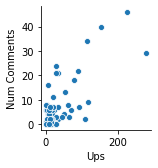

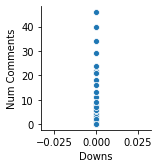

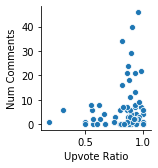

In [113]:
for i in range(1,len(workNum.columns)):
    sns.pairplot(workNum,y_vars=['Num Comments'],x_vars=workNum.columns[i])
    # CORRELATION BETWEEN DIFFERENT PARAMETERS

### 2.8.6 Heat Maps

The below heat map shows Significant Correlation of the upvote ratio and other parameters.

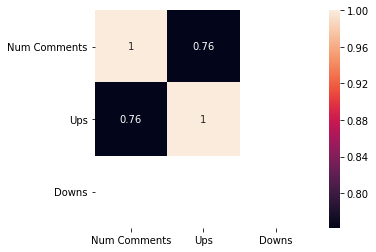

In [116]:
sig_corr=workNum.drop('Upvote Ratio',axis=1).corr()
sns.heatmap(sig_corr[(sig_corr>=0.5)|(sig_corr<=-0.4)],square=True,annot=True)

### 2.8.7 Box Plots

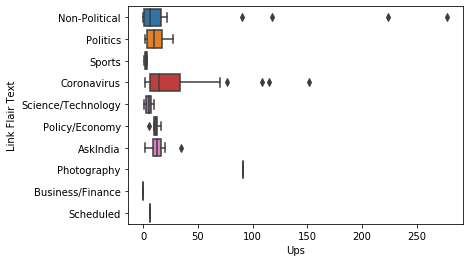

In [121]:
    box1= sns.boxplot(x='Ups',y='Link Flair Text',data=work)